In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../data/'

In [3]:
# list of the stocks from each sector to compare
stock_list = [
    ('aapl', 'apple'), 
    ('xom', 'exxon'), 
    ('shw', 'sherwinn williams'),
    ('lmt', 'lockheed martin'),
    ('amzn', 'amazon'),
    ('wmt', 'walmart'),
    ('jnj', 'johnson and johnson'),
    ('jpm', 'jp morgan'),
    ('cmcsa', 'comcast'),
    ('xel', 'excel energy'),
    ('spg', 'simon property group')
]

# Economy data loading and graphing functions

In [4]:
import pandas as pd
import numpy as np 

class Economy:

    def __init__(self, start_date, end_date, path):
        self.start_date = start_date
        self.end_date = end_date
        self.data = pd.read_csv(path)

    def filter_unemp_data(self, col_name, duration):
        date_data = self.data['DATE'].to_numpy()
        
        # date data
        for i, day in enumerate(date_data):
            if day == self.start_date:
                break

        # new dataframe data
        filtered_data = {'date': self.data['DATE'].iloc[i:i+duration], 
                         col_name.lower(): self.data[col_name].iloc[i:i+duration]}
        
        # new dataframe to return
        df = pd.DataFrame(filtered_data)
        df.set_index('date', inplace=True)
        return df
    
    def make_graph(self, data, xlabel, ylabel, title, labels, path):
        plt.figure(figsize=(10, 6))
        plt.plot(data)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=25)
        plt.legend(labels)
        plt.savefig(path)


# running the local economy data for california during the wildfires

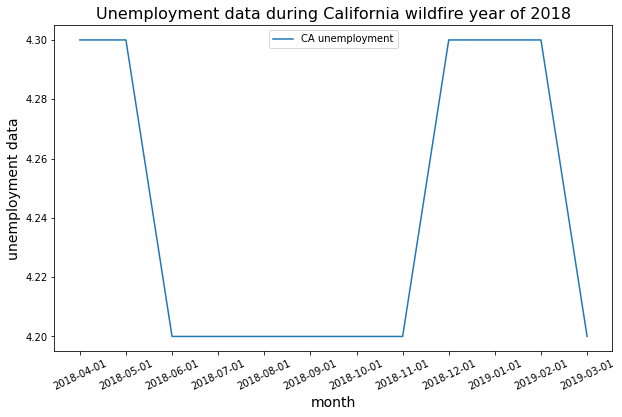

In [5]:
cali_unemp = Economy('2018-04-01', '2019-04-01', path+'ca_unemp.csv')
filtered_data_ca = cali_unemp.filter_unemp_data('CAUR', 12)
cali_unemp.make_graph(filtered_data_ca, 
                      'month',
                      'unemployment data', 
                      'Unemployment data during California wildfire year of 2018',
                      ['CA unemployment'],
                      path+'figures/ca_unemp.png')

In [6]:
filtered_data_ca

,caur
date,
2018-04-01,4.3
2018-05-01,4.3
2018-06-01,4.2
2018-07-01,4.2
2018-08-01,4.2
2018-09-01,4.2
2018-10-01,4.2
2018-11-01,4.2
2018-12-01,4.3


# running the local economy for hurricane Katrina

In [7]:
la_unemp = Economy('2005-05-01', '2006-05-01', path+'la_unemp.csv')

In [8]:
filtered_data_la = la_unemp.filter_unemp_data('LAUR', 12)

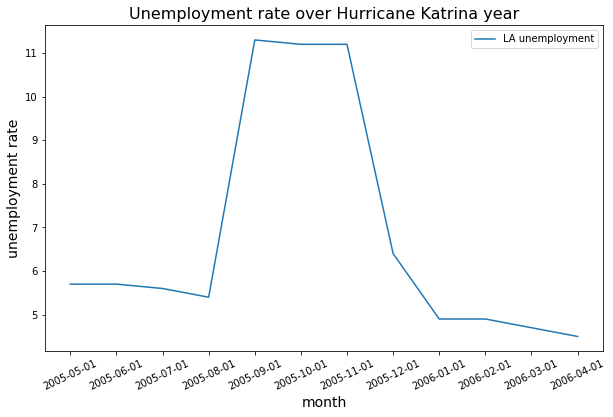

In [9]:
la_unemp.make_graph(filtered_data_la,
                    'month', 
                    'unemployment rate',
                    'Unemployment rate over Hurricane Katrina year',
                    ['LA unemployment'],
                    path+'figures/la_unemp.png')

# us unemployment during katrina, california, and recession

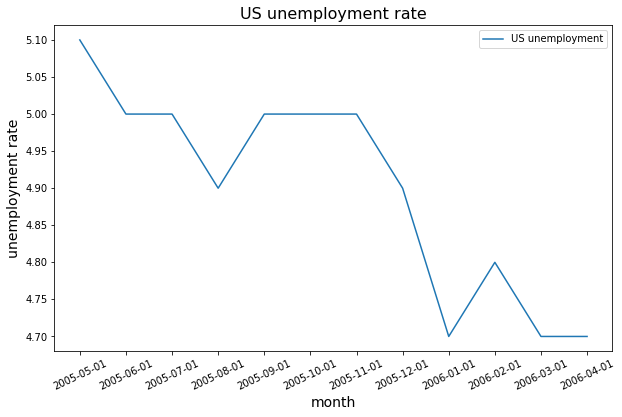

In [10]:
us_unemp = Economy('2005-05-01', '2006-05-01', path+'us_unemp.csv')
filtered_data_us = us_unemp.filter_unemp_data('UNRATE', 12)
us_unemp.make_graph(filtered_data_us,
                    'month', 
                    'unemployment rate',
                    'US unemployment rate', 
                    ['US unemployment'],
                    path+'figures/us_unemp.png')

In [11]:
filtered_data_us.describe()

,unrate
count,12.000000
mean,4.900000
std,0.141421
min,4.700000
25%,4.775000
50%,4.950000
75%,5.000000
max,5.100000


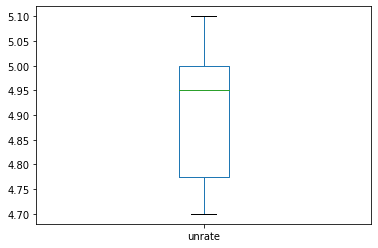

In [12]:
filtered_data_us.plot.box()

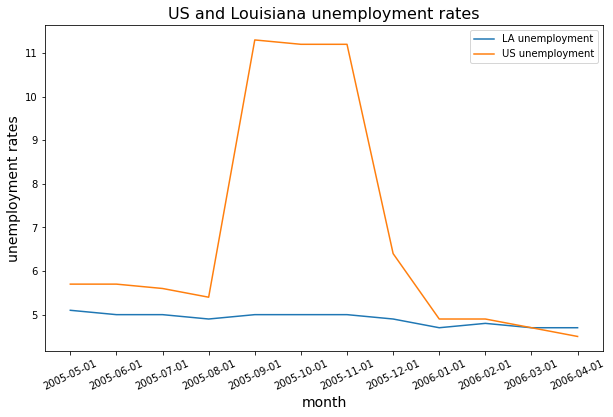

In [13]:
us_unemp.make_graph(filtered_data_us.append(filtered_data_la),
                    'month', 
                    'unemployment rates', 
                    'US and Louisiana unemployment rates', 
                    ['LA unemployment', 'US unemployment'],
                    path+'figures/us_la_unemp.png')

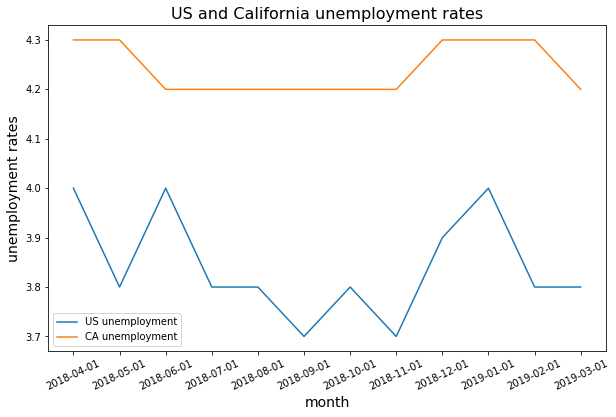

In [14]:
us_cali_unemp = Economy('2018-04-01', '2019-04-01', path+'us_unemp.csv')
filtered_data_us = us_cali_unemp.filter_unemp_data('UNRATE', 12)

us_cali_unemp.make_graph(filtered_data_us.append(filtered_data_ca), 
                         'month', 
                         'unemployment rates',
                         'US and California unemployment rates',
                         ['US unemployment', 'CA unemployment'],
                         path+'figures/ca_us_unemp.png')

In [15]:
filtered_data_us.describe()

,unrate
count,12.000000
mean,3.841667
std,0.108362
min,3.700000
25%,3.800000
50%,3.800000
75%,3.925000
max,4.000000


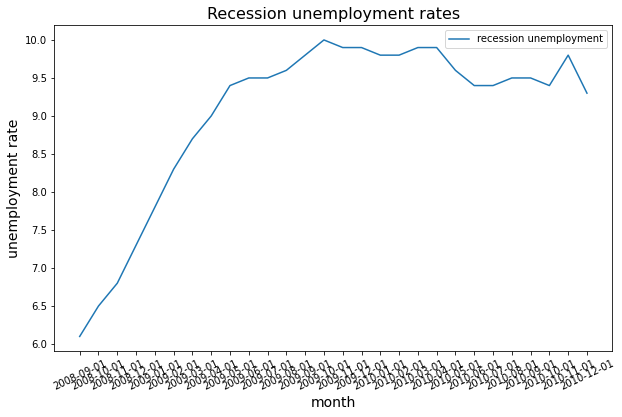

In [16]:
recession_unemp = Economy('2008-09-01', '', path+'us_unemp.csv')
filtered_rec = recession_unemp.filter_unemp_data('UNRATE', 28)
recession_unemp.make_graph(filtered_rec,
                           'month',
                           'unemployment rate', 
                           'Recession unemployment rates',
                           ['recession unemployment'], 
                           path+'figures/recession_unemp.png')

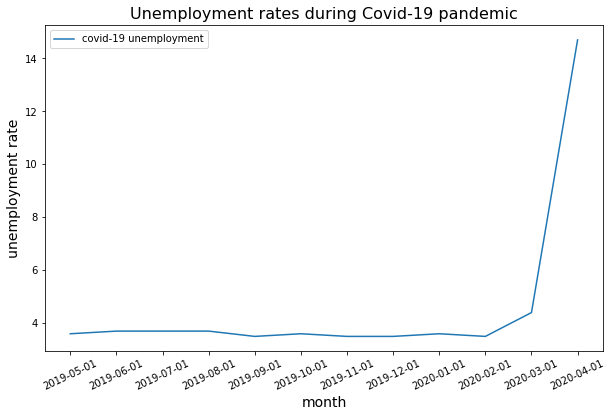

In [17]:
covid_unemp = Economy('2019-05-01', '', path+'us_unemp.csv')
covid_filter = covid_unemp.filter_unemp_data('UNRATE', 12)
covid_unemp.make_graph(covid_filter, 
                       'month', 
                       'unemployment rate',
                       'Unemployment rates during Covid-19 pandemic',
                       ['covid-19 unemployment'],
                       path+'figures/cov_unemp.png')

In [18]:
covid_filter


,unrate
date,
2019-05-01,3.6
2019-06-01,3.7
2019-07-01,3.7
2019-08-01,3.7
2019-09-01,3.5
2019-10-01,3.6
2019-11-01,3.5
2019-12-01,3.5
2020-01-01,3.6


# Stock data 

This class is a container for the stock data that is being loaded with the specific time series. There is normalized data and functionality for plotting the data. 

In [19]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Comparing stocks at a local level
class StockData:

    # initializing the class
    def __init__(self, stock_list, start_date, end_date):
        self.stock_list = stock_list
        self.start_date = start_date
        self.end_date = end_date

    # getting data from the stock
    def get_data(self):
        stock_ticker = yf.Tickers(' '.join([stock for (stock,_) in self.stock_list]))
        self.data = stock_ticker.history(
            interval='1d', 
            start=self.start_date, 
            end=self.end_date)['Close']
        self.data.rename(
            columns={ stock.upper(): name for (stock, name) in self.stock_list }, 
            inplace=True)

    # normalizing the data from the stocks
    def normalize_data(self):
        self.norm_data = pd.DataFrame()
        for (_, name) in self.stock_list:
            min_val = self.data[name].min(axis=0)
            max_val = self.data[name].max(axis=0)
            numerator = self.data[name] - min_val
            denominator = max_val - min_val
            # numerator = self.data[name] - self.data[name].mean(axis=0)
            # denominator = self.data[name].std(axis=0)
            self.norm_data[name] = numerator / denominator

    # visual representation of the data
    def plot_data(self, mean, title, labels, fig_path):
        plt.figure(figsize=(10, 6))
        if mean:
            plt.plot(self.norm_data.mean(axis=1))
            title = title + '_mean'
        else:
            plt.plot(self.norm_data)
        plt.xlabel('Date')
        plt.ylabel('Normalized Stock price')
        plt.title(title)
        plt.legend(loc=(1.04, 0), labels=labels)
        plt.savefig(fig_path)


The following is the gathering of all data within the specified time periods for each of the designated events. The events are Hurricane Katrina, the California wildfires of 2018, the recession of 2008 and our current Covid-19 situation. The data is gather and the appropriate plots are created for each of the timeframes.

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed


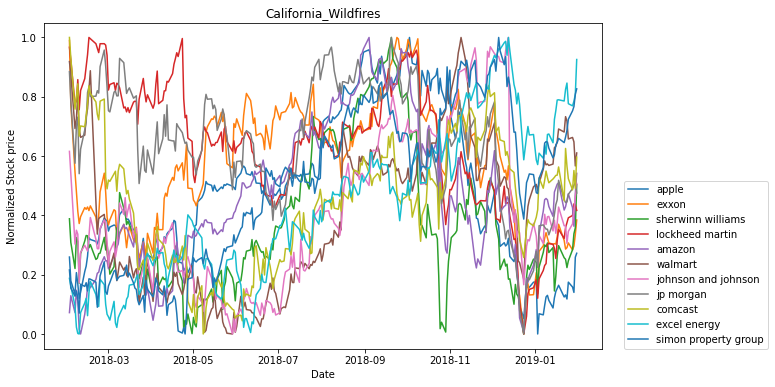

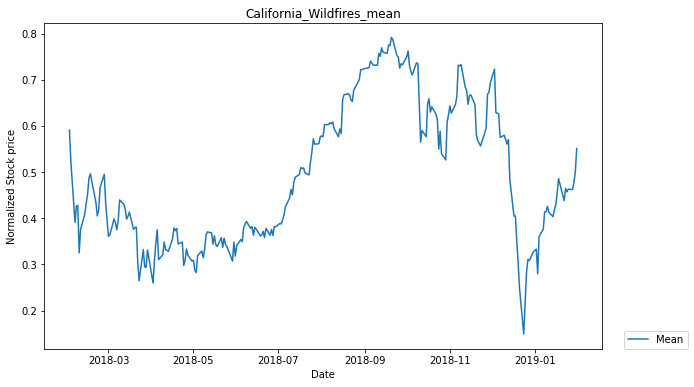

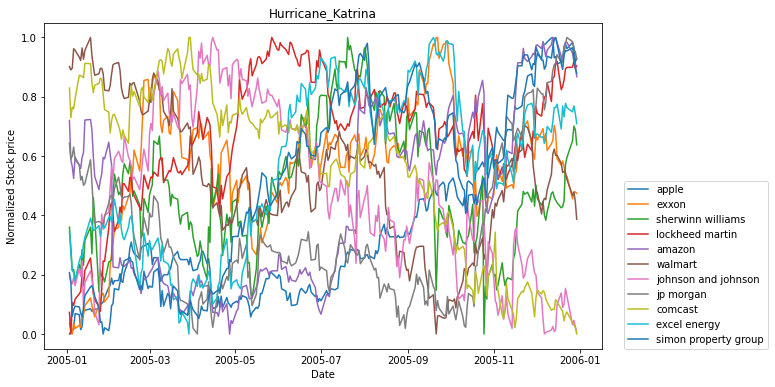

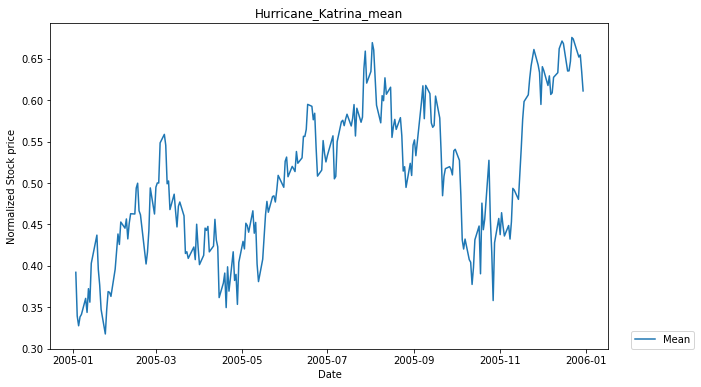

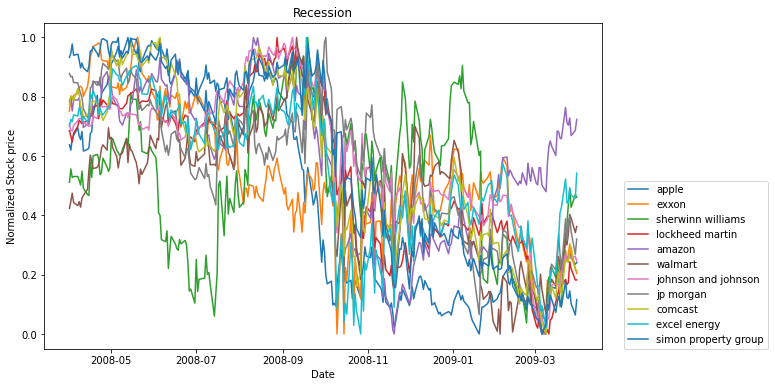

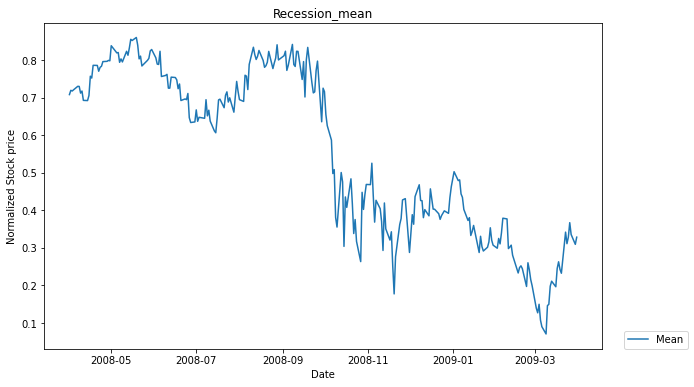

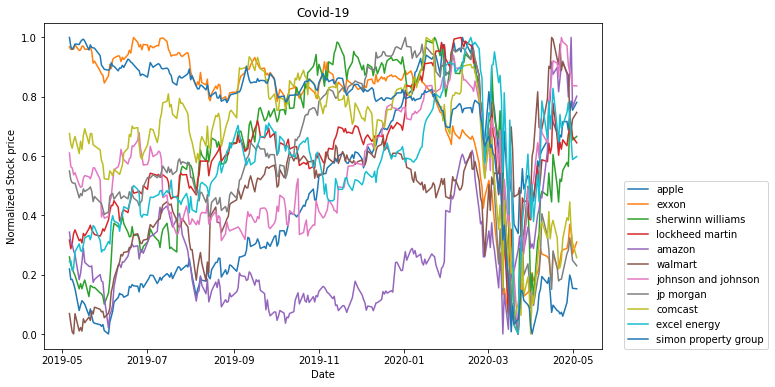

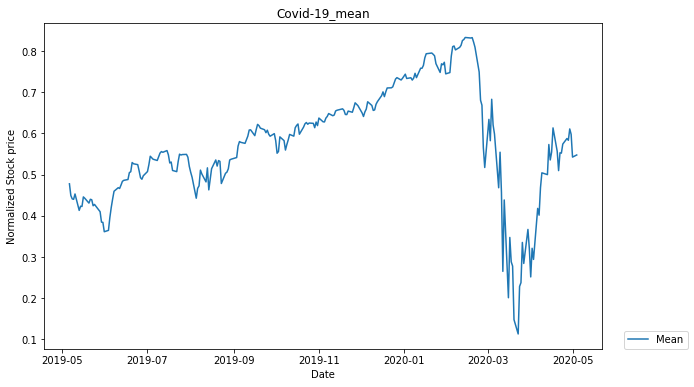

In [20]:
# controller
def timeframe_stock_data(timeframes):
    data = {}
    # making the data for each time frame 
    for name, [start, end] in timeframes.items():
        stocks = StockData(stock_list, start, end)
        stocks.get_data()
        stocks.normalize_data()
        stocks.plot_data(False, name, [n for (_, n) in stock_list], '../data/figures/'+name+'.png')
        stocks.plot_data(True, name, ['Mean'], '../data/figures/'+name+'_mean.png')
        data[name] = stocks
    return data

# running the main program
timeframes = {
    'California_Wildfires': ['2018-02-01', '2019-02-01'],
    'Hurricane_Katrina': ['2005-01-01', '2006-01-01'],
    'Recession': ['2008-04-01', '2009-04-01'],
    'Covid-19': ['2019-05-05', '2020-05-05']
}
    
# getting the data for the time frame
timeframe_data = timeframe_stock_data(timeframes)

In [21]:
time_data = pd.DataFrame()
for name, data in timeframe_data.items():
    mean_data = data.norm_data.mean(axis=1).to_numpy()[:251]
    time_data[name] = mean_data
time_data = time_data.dropna()

In [22]:
time_data.head()

,California_Wildfires,Hurricane_Katrina,Recession,Covid-19
0,0.590865,0.392209,0.708254,0.477850
1,0.523801,0.339389,0.719538,0.449527
2,0.390989,0.327662,0.717809,0.441189
3,0.426669,0.338385,0.721033,0.440254
4,0.427766,0.341314,0.730283,0.453175


In [23]:
time_data_values = time_data.values

Measuring the cross entropy for each dataset against the other datasets

In [24]:
# making buckets for the data 
def make_probability_buckets(data):
    buckets = {}
    for point in data:
        if point not in buckets:
            buckets[point] = 1
        else:
            value = buckets.get(point)
            buckets[point] = value + 1

    length = len(data)
    for key, prob in buckets.items():
        buckets[key] = prob / length

    return buckets

In [25]:
# measuring the cross entropy of two datasets
def cross_entropy(data_one, data_two):
    data_one = data_transform(data_one)
    data_two = data_transform(data_two)
    m = -np.multiply(data_one, np.log2(data_two))
    return np.sum(m)

In [26]:
def data_transform(data):
    data = np.floor(data * 100).astype(int)
    buckets = make_probability_buckets(data)
    data = [buckets[point] for point in data]
    return data

In [27]:
def mutual_information(data_one, data_two):
    # transforming the data into its probabilities
    data_one_trans = data_transform(data_one)
    data_two_trans = data_transform(data_two)
    total = 0

    # go through each of the lists inputs 
    for point in data_one_trans:
        for point_two in data_two_trans:
        # getting the joint probabilities of the data
            joint_data = point * point_two
            point_two_conditional = point_two * point / point
            point_conditional = point * point_two / point_two
            total += joint_data - point_two_conditional - point_conditional
        # joint_data = data_transform(
        #     np.divide(np.multiply(data_one_trans, 
        #                         data_two_trans), 
        #             data_two_trans))
        # # running the log function on the probabilities
        # log_data = np.log2(
        #     np.divide(joint_data, 
        #             np.multiply(data_one_trans, 
        #                         data_two_trans)))
    
    return total

In [28]:
# covid data for comparison for modeling
data = time_data['Covid-19']
entropy_data = []

# getting the cross entropy comparison of each value agains the other
for col in time_data.columns[:-1]:
    ent = cross_entropy(data, time_data[col])
    entropy_data.append(ent)
    print(f'{col}: {ent}')

California_Wildfires: 36.23059566235318
Hurricane_Katrina: 33.8313637181726
Recession: 37.82851869059304


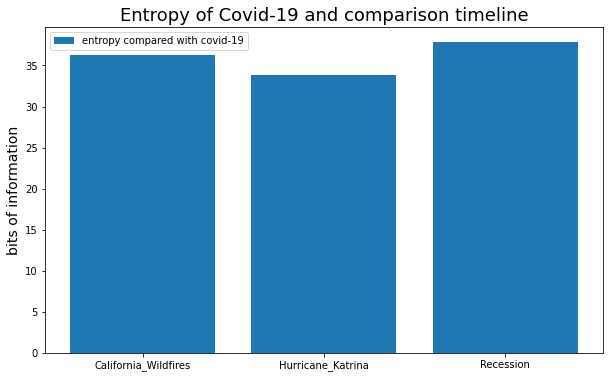

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Entropy of Covid-19 and comparison timeline', fontsize=18)
plt.bar(time_data.columns[:-1], entropy_data)
plt.legend(['entropy compared with covid-19'])
plt.ylabel('bits of information', fontsize=14)
plt.savefig('../data/figures/cross_ent.png')

Plotting the full time data and plotting the comparison between the California wildfire data and the Covid-19 data

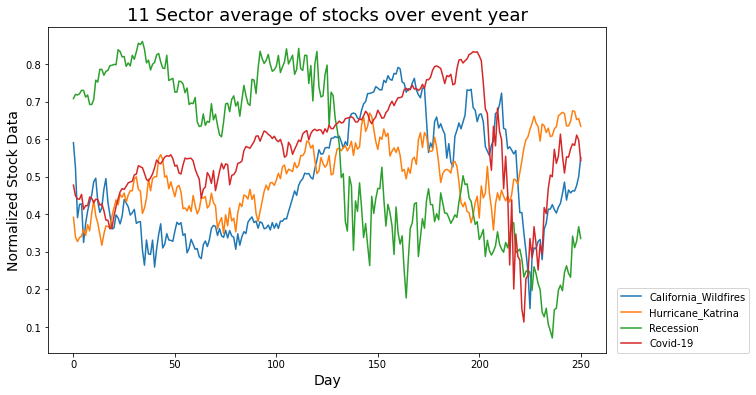

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(time_data)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Normalized Stock Data', fontsize=14)
plt.title('11 Sector average of stocks over event year', fontsize=18)
plt.legend(loc=(1.02, 0), labels=time_data.columns)
plt.savefig('../data/figures/11sector_comparison.png')

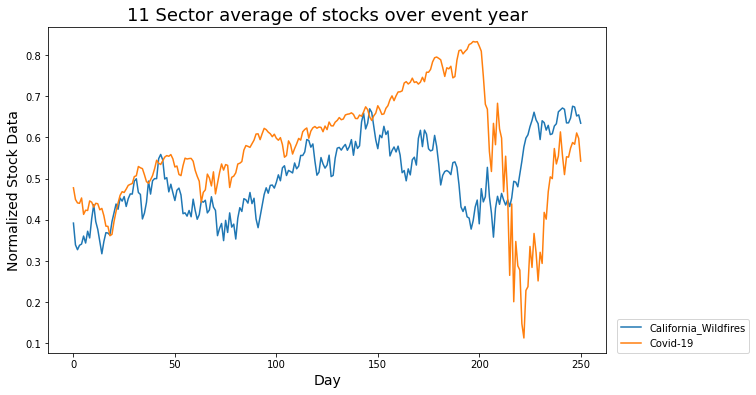

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(time_data[['Hurricane_Katrina', 'Covid-19']])
plt.xlabel('Day', fontsize=14)
plt.ylabel('Normalized Stock Data', fontsize=14)
plt.title('11 Sector average of stocks over event year', fontsize=18)
plt.legend(loc=(1.02, 0), labels=['California_Wildfires', 'Covid-19'])
plt.savefig(path+'/figures/kat_covid_stock.png')

# Testing 

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf

In [33]:
time_data = time_data.dropna()
time_data.head()

,California_Wildfires,Hurricane_Katrina,Recession,Covid-19
0,0.590865,0.392209,0.708254,0.477850
1,0.523801,0.339389,0.719538,0.449527
2,0.390989,0.327662,0.717809,0.441189
3,0.426669,0.338385,0.721033,0.440254
4,0.427766,0.341314,0.730283,0.453175


In [34]:
time_data_array = time_data.to_numpy()

Getting the Pearson correlation value to determine how closely related the values are to each other. This will be contained in a dataframe used to determine the model to use for prediction.

In [35]:
coef_data = pd.DataFrame(
    np.corrcoef(time_data_array.T), 
    index=list(time_data.columns),
    columns=list(time_data.columns)
)

In [36]:
coef_data.head()

,California_Wildfires,Hurricane_Katrina,Recession,Covid-19
California_Wildfires,1.000000,0.309440,-0.473386,0.673800
Hurricane_Katrina,0.309440,1.000000,-0.549575,0.177656
Recession,-0.473386,-0.549575,1.000000,-0.145188
Covid-19,0.673800,0.177656,-0.145188,1.000000


# performing the tensorflow portion of modeling

In the above data we see that the strongest correlation to the Covid-19 data is the California wildfire data. A model based on California wildfire will be used to predict the Covid-19 future. 

Below we will create the model based on the California wildfires using a time series and Tensorflow.

In [37]:
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = (10, 6)

Making a method for grouping the time series based on a window size.

In [38]:
tickers = yf.Tickers([stock for (stock, _) in stock_list])
data = tickers.history('1y', start='2005-01-01', end='2006-01-01', interval='1d')['Close']
data = data.dropna()

[*********************100%***********************]  11 of 11 completed


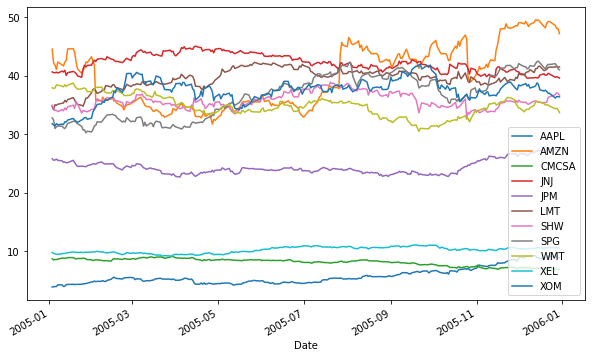

In [39]:
data.plot()

Normalizing the data to ensure that each stock's data is in the workable range and that no stock influences the results more than another.

In [40]:
def normalize(data):
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    return (data - data_min) / (data_max - data_min)

In [41]:
dataset = data.values

In [42]:
dataset = np.mean(normalize(dataset), axis=1).reshape(dataset.shape[0], 1)

In [43]:
dataset.shape

(252, 1)

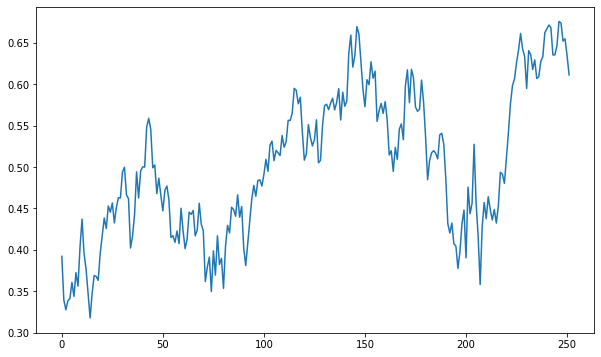

In [44]:
plt.plot(dataset)

In [45]:
tf.random.set_seed(7)

## Setting the size of the training and validation data and then proceeding to split the data for training purposes.

In [46]:
def split_data(dataset, target_data, start_index, end_index, window_size):
    data = []
    labels = []

    # going through the data and creating frames of windows for predictions
    end_index = end_index - window_size
    for i in range(start_index, end_index):
        # getting the window for the data 
        window = range(i, i + window_size)
        
        # adding the window sized data to our dataset
        data.append(np.reshape(dataset[window], (wind_size, 1)))

        # labels from the target data to predice from the window size
        labels.append(dataset[i + window_size])
    return np.array(data), np.array(labels)

In [62]:
train_size = int(len(dataset) * 0.8)
wind_size = 6

In [63]:
y_train = dataset[wind_size:]

In [64]:
x_train, y_train = split_data(dataset, 
                              y_train, 
                              0,
                              dataset.shape[0], 
                              wind_size)

In [65]:
print(x_train[0:3])
print(y_train[:2])

[[[0.3922088 ]
  [0.33938896]
  [0.32766208]
  [0.33838465]
  [0.34131376]
  [0.36073202]]

 [[0.33938896]
  [0.32766208]
  [0.33838465]
  [0.34131376]
  [0.36073202]
  [0.34380305]]

 [[0.32766208]
  [0.33838465]
  [0.34131376]
  [0.36073202]
  [0.34380305]
  [0.3724649 ]]]
[[0.34380305]
 [0.3724649 ]]


# Normalizing the data for the covid timeline

In [66]:
data_test = tickers.history('1y', start='2019-05-01', end='2020-05-01', interval='1d')['Close']
data_test = data_test.dropna()

[*********************100%***********************]  11 of 11 completed


In [67]:
data_test_norm = data_test.values
data_test_norm = np.mean(normalize(data_test_norm), axis=1).reshape(data_test_norm.shape[0], 1)

In [68]:
x_test_data, y_test_data = split_data(
    data_test_norm,
    data_test_norm[wind_size:],
    0, 
    data_test_norm.shape[0],
    wind_size
)

Checking that the data was split properly and that the plot is matching.

In [69]:
def plot_model(dataset, target, prediction, window_size, title):
    labels = ['x values', 'actual', 'prediction']
    marker = ['.-', 'rx', 'go']

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.plot(range(window_size), dataset, marker[0], label=labels[0])
    plt.plot(window_size, target, marker[1], label=labels[1])
    if prediction is not None:
        plt.plot(window_size, prediction, marker[2], label=labels[2])
    plt.xlabel('data')
    plt.ylabel('y data')
    plt.legend()

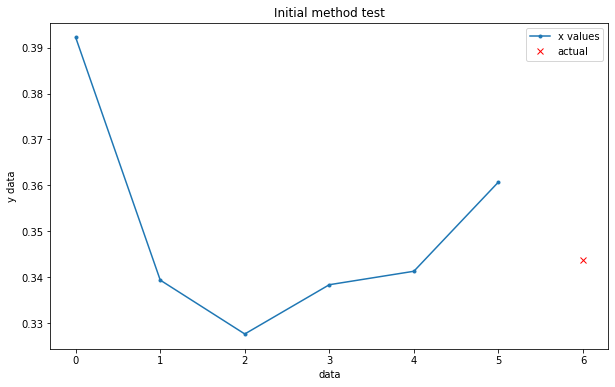

In [70]:
plot_model(x_train[0], y_train[0], None, wind_size, 'Initial method test')

Training the model 

In [71]:
BATCH_SIZE = 128
BUFFER_SIZE = 40

x_values = tf.data.Dataset.from_tensor_slices((x_train, y_train))
x_values = x_values.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

x_test = tf.data.Dataset.from_tensor_slices((x_test_data, y_test_data))
x_test = x_test.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [72]:
print(x_train)

[[[0.3922088 ]
  [0.33938896]
  [0.32766208]
  [0.33838465]
  [0.34131376]
  [0.36073202]]

 [[0.33938896]
  [0.32766208]
  [0.33838465]
  [0.34131376]
  [0.36073202]
  [0.34380305]]

 [[0.32766208]
  [0.33838465]
  [0.34131376]
  [0.36073202]
  [0.34380305]
  [0.3724649 ]]

 ...

 [[0.63542346]
  [0.63559581]
  [0.64710348]
  [0.67593049]
  [0.67407443]
  [0.65226464]]

 [[0.63559581]
  [0.64710348]
  [0.67593049]
  [0.67407443]
  [0.65226464]
  [0.65494314]]

 [[0.64710348]
  [0.67593049]
  [0.67407443]
  [0.65226464]
  [0.65494314]
  [0.63469796]]]


In [81]:
model = Sequential([
    LSTM(12, input_shape=x_train.shape[-2:]),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=tf.optimizers.RMSprop(0.001),
    loss='mae',
    metrics=['accuracy']
)

In [82]:
for x, y in x_values.take(1):
    print(model.predict(x).shape)

(128, 1)


In [83]:
model.fit(
    x_values,
    epochs=50,
    steps_per_epoch=100
)

Train for 100 steps
Epoch 1/50
100/100 [==============================] - 2s 16ms/step - loss: 0.0948 - accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.0000e+00
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.0000e+00
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.0000e+00
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.0000e+00
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.0000e+00
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.0000e+00
Epoch 10/50
100/100 [======================

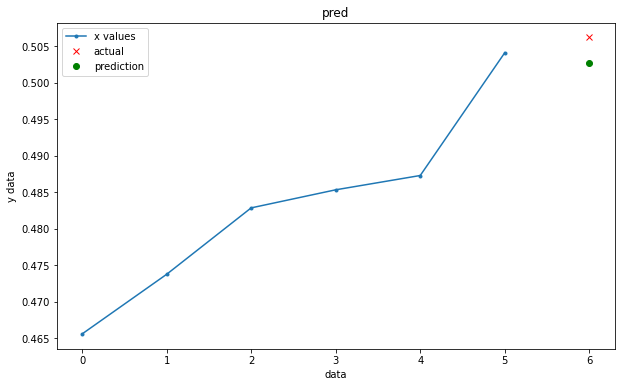

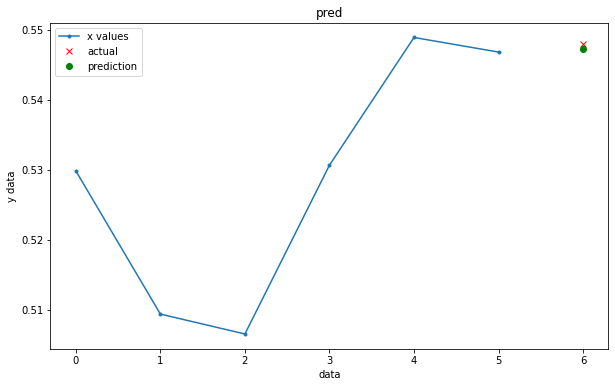

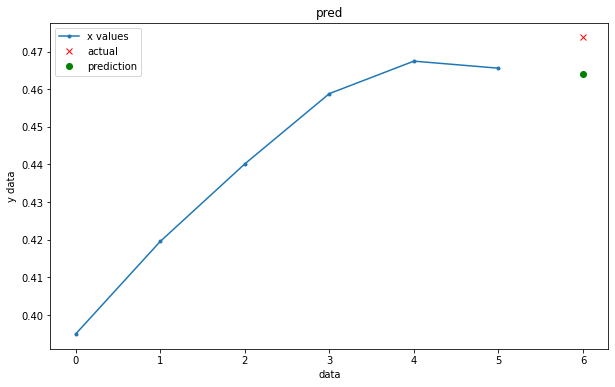

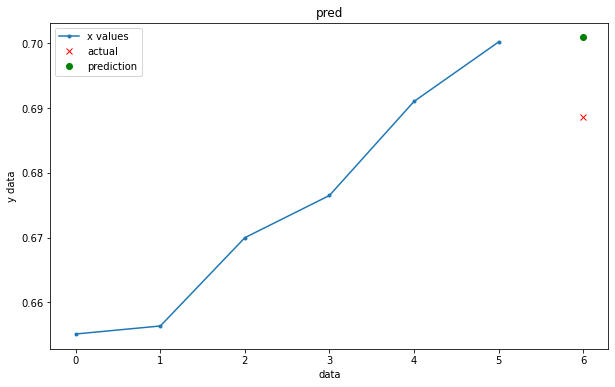

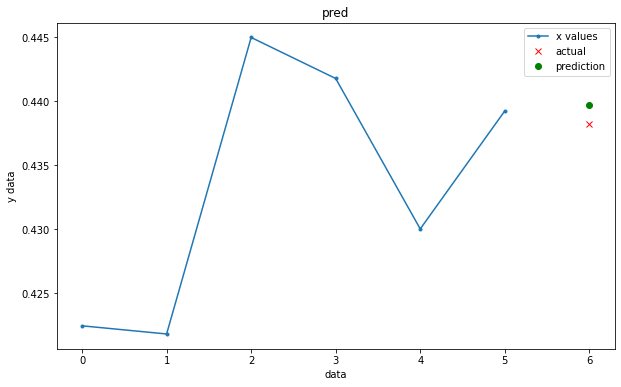

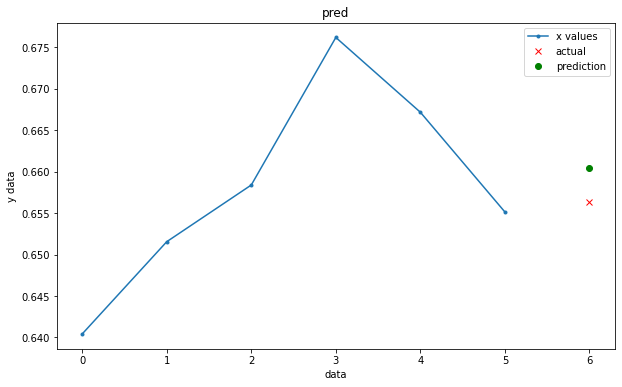

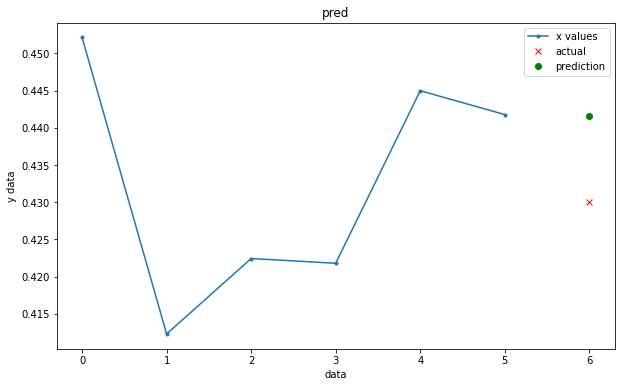

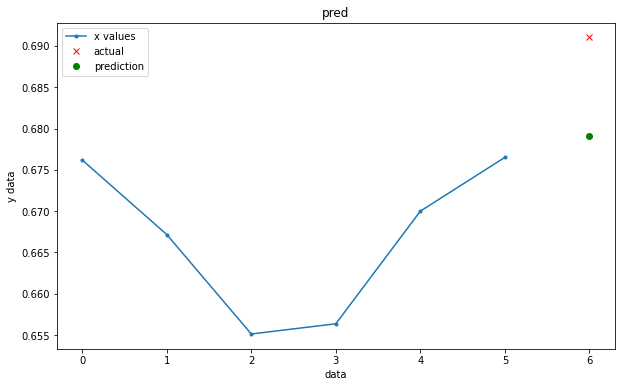

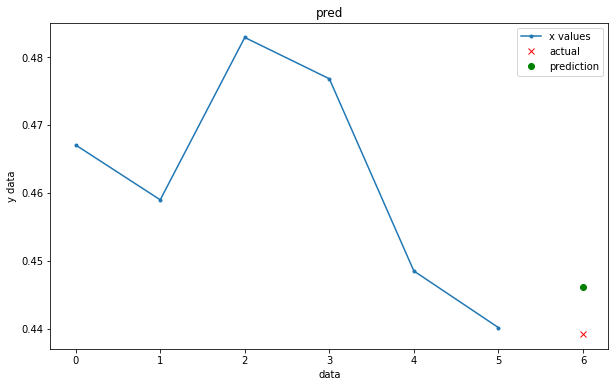

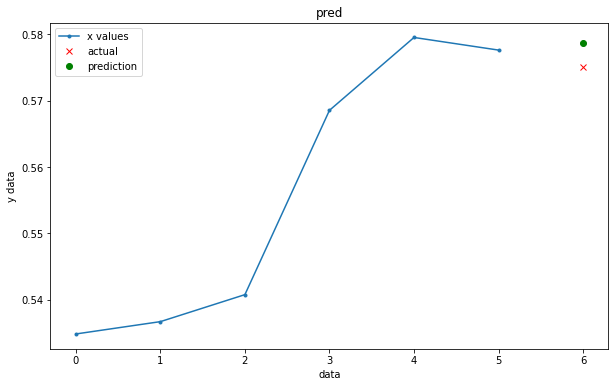

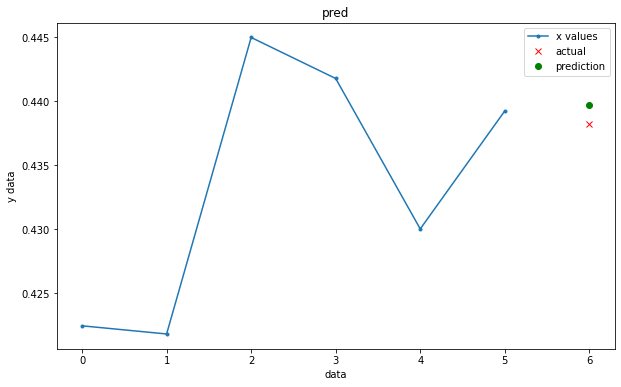

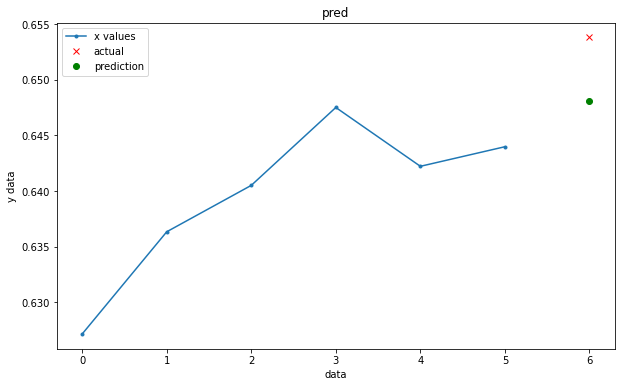

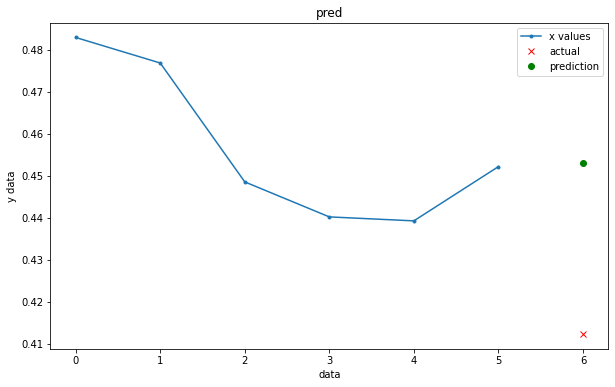

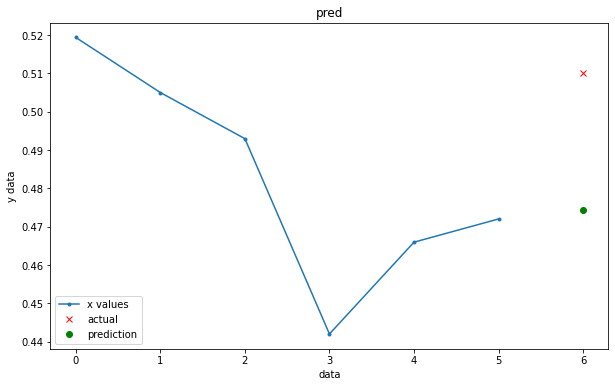

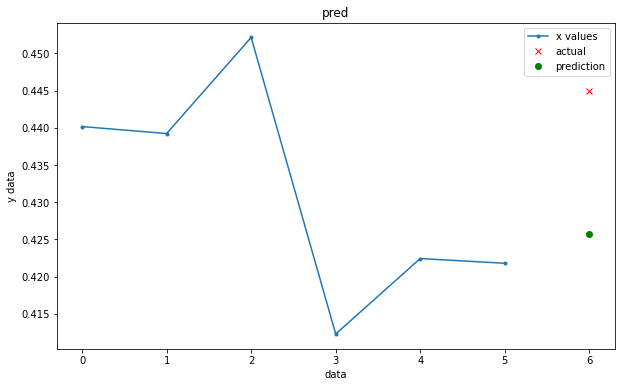

In [85]:
import matplotlib.pyplot as plt
for xt, yt in x_test.take(15):
    plot_model(xt[0].numpy(), yt[0].numpy(), model.predict(xt)[0], wind_size, 'pred')
    plt.show()